Official documentation:
http://powietrze.gios.gov.pl/pjp/content/api#

In [1]:
%matplotlib inline

In [2]:
import requests
from pandas.io.json import json_normalize
import pandas as pd

Getting all stations:

In [3]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/station/findAll')

In [4]:
allStations = json_normalize(r.json())

In [5]:
allStations[allStations["city.name"] == u"Gdańsk"]

,addressStreet,city,city.commune.communeName,city.commune.districtName,city.commune.provinceName,city.id,city.name,dateEnd,dateStart,gegrLat,gegrLon,id,stationName
2,ul. Powstańców Warszawskich,NaN,Gdańsk,Gdańsk,POMORSKIE,218.0,Gdańsk,None,1996-10-01 12:00:00,54.353336,18.635283,729,AM1 Gdańsk Śródmieście
14,ul. Kaczeńce,NaN,Gdańsk,Gdańsk,POMORSKIE,218.0,Gdańsk,None,1996-10-01 12:00:00,54.367778,18.701111,730,AM2 Gdańsk Stogi
26,ul. Wyzwolenia,NaN,Gdańsk,Gdańsk,POMORSKIE,218.0,Gdańsk,None,1998-09-01 12:00:00,54.400833,18.657497,731,AM3 Gdańsk Nowy Port
67,ul. Leczkowa,NaN,Gdańsk,Gdańsk,POMORSKIE,218.0,Gdańsk,None,1998-10-01 12:00:00,54.380279,18.620274,736,AM8 Gdańsk Wrzeszcz
75,ul. Ostrzycka,NaN,Gdańsk,Gdańsk,POMORSKIE,218.0,Gdańsk,None,1998-05-01 12:00:00,54.328336,18.557781,733,AM5 Gdańsk Szadółki


Lets see what we have in "AM5 Gdańsk Szadółki" which has id: 733

In [6]:
stationId = 733

In [7]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/station/sensors/' + str(stationId))

In [8]:
sensors = json_normalize(r.json())

In [9]:
sensors

,id,param.idParam,param.paramCode,param.paramFormula,param.paramName,sensorDateEnd,sensorDateStart,stationId
0,4720,8,CO,CO,tlenek węgla,None,1998-05-01 12:00:00,733
1,4727,3,PM10,PM10,pył zawieszony PM10,None,1998-05-01 12:00:00,733
2,4723,6,NO2,NO2,dwutlenek azotu,None,1998-05-01 12:00:00,733
3,4725,5,O3,O3,ozon,None,1998-05-01 12:00:00,733
4,4730,1,SO2,SO2,dwutlenek siarki,None,1998-05-01 12:00:00,733


Lets now see data about PM10 concentration - sensorId = 4727

In [10]:
sensorId = 4727

In [11]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/data/getData/' + str(sensorId))

In [12]:
concentration = json_normalize(r.json())

In [13]:
concentrationFrame = pd.DataFrame()

In [14]:
concentrationFrame["dates"] = [d[u'date'] for d in concentration["values"].values.item()]
concentrationFrame["values"] = [d[u'value'] for d in concentration["values"].values.item()]

In [15]:
concentrationFrame.set_index(["dates"], inplace=True)
#concentrationFrame.sort_index(inplace=True)
# We cannot sort index, because it is not unique. There is 12 hours notation used, but without AM/PM distinction ;(
# But we can just reverse it until API will be fixed
concentrationFrame = concentrationFrame.iloc[::-1]

In [16]:
concentrationFrame

,values
dates,
2017-04-16 01:00:00,18.64540
2017-04-16 02:00:00,8.53258
2017-04-16 03:00:00,3.52958
2017-04-16 04:00:00,2.12867
2017-04-16 05:00:00,1.00000
2017-04-16 06:00:00,12.96610
2017-04-16 07:00:00,13.20580
2017-04-16 08:00:00,2.32258
2017-04-16 09:00:00,12.68400


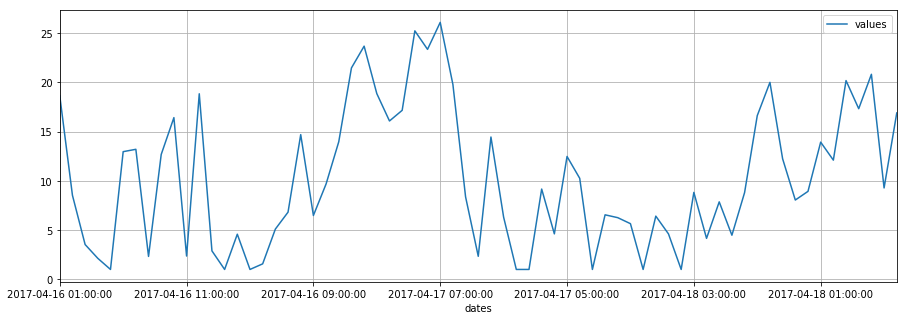

In [17]:
concentrationFrame.plot(figsize=(15,5), grid=True)

And overall air quality index for the same station

In [18]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/aqindex/getIndex/' + str(stationId))

In [19]:
r.json()

{u'c6h6CalcDate': None,
 u'c6h6IndexLevel': None,
 u'c6h6SourceDataDate': None,
 u'coCalcDate': u'2017-04-18 08:16:01',
 u'coIndexLevel': {u'id': 0, u'indexLevelName': u'Bardzo dobry'},
 u'coSourceDataDate': u'2017-04-18 07:00:00',
 u'id': 733,
 u'no2CalcDate': u'2017-04-18 08:16:01',
 u'no2IndexLevel': {u'id': 0, u'indexLevelName': u'Bardzo dobry'},
 u'no2SourceDataDate': u'2017-04-18 07:00:00',
 u'o3CalcDate': u'2017-04-18 08:16:01',
 u'o3IndexLevel': {u'id': 2, u'indexLevelName': u'Umiarkowany'},
 u'o3SourceDataDate': u'2017-04-18 07:00:00',
 u'pm10CalcDate': u'2017-04-18 08:16:01',
 u'pm10IndexLevel': {u'id': 0, u'indexLevelName': u'Bardzo dobry'},
 u'pm10SourceDataDate': u'2017-04-18 07:00:00',
 u'pm25CalcDate': u'2017-04-18 08:16:01',
 u'pm25IndexLevel': None,
 u'pm25SourceDataDate': None,
 u'so2CalcDate': u'2017-04-18 08:16:01',
 u'so2IndexLevel': {u'id': 0, u'indexLevelName': u'Bardzo dobry'},
 u'so2SourceDataDate': u'2017-04-18 07:00:00',
 u'stCalcDate': u'2017-04-18 08:16:01'